# Distance Loop calculation attempt in python

In [1]:
import os
import folium
import shapely
import gdal
import descartes
import scipy as scp
import numpy as np
import earthpy as et
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set paths

os.chdir("/home/chris/Dropbox/EAGLE_Assessments/MET1_Model/MET1_immo/")
vector_path = os.path.join(os.getcwd(), "Vector")

## Distance loop for Las Condes

In [3]:
BasePrice_LC = gpd.read_file(os.path.join(vector_path, "BasePrice_LC.geojson"), crs = 9184)

LC_lesPSamp = gpd.read_file(os.path.join(vector_path, "LC_lesPSamp.geojson"), crs = 9184)
LC_resPSamp = gpd.read_file(os.path.join(vector_path, "LC_resPSamp.geojson"), crs = 9184)
LC_amyPSamp = gpd.read_file(os.path.join(vector_path, "LC_amyPSamp.geojson"), crs = 9184)

In [4]:
for i in BasePrice_LC.iloc[:, 9]:
    for j in LC_resPSamp.iloc[:, 3]:
        for k in LC_lesPSamp.iloc[:, 3]:
            for l in LC_amyPSamp.iloc[:, 3]:
                
                LC_les2res = gpd.tools.util.MultiLineString
                LC_amy2res = gpd.tools.util.MultiLineString
                
                if j.within(i) == True and \
                k.within(i) == True and \
                l.within(i) == True:
                    
                    LC_les2res += i.distance(k)
                    LC_amy2res += i.distance(l)

KeyboardInterrupt: 

In [25]:
for i in BasePrice_LC.iloc[:, 9]:
    for j, k, l in zip(LC_resPSamp.iloc[:, 3], LC_lesPSamp.iloc[:, 3], LC_amyPSamp.iloc[:, 3]):
        
        LC_les2res = gpd.GeoDataFrame[LC_les2res, crs = 9184, geometry = shapely.geometry.asMultiLineString]
        LC_amy2res = gpd.GeoDataFrame[LC_amy2res, crs = 9184, geometry = shapely.geometry.asMultiLineString]
        
        if j.within(i) == True and \
        k.within(i) == True and \
        l.within(i) == True:
            
            LC_les2res.geometry += i.distance(k)
            LC_amy2res.geometry += i.distance(l)

SyntaxError: invalid syntax (<ipython-input-25-3816333a2855>, line 4)

In [16]:
LC_les2res.head()

AttributeError: 'function' object has no attribute 'head'

In [20]:
LC_resPSamp.geometry[98].distance(BasePrice_LC.geometry[234])

0.038125127501202796

<AxesSubplot:>

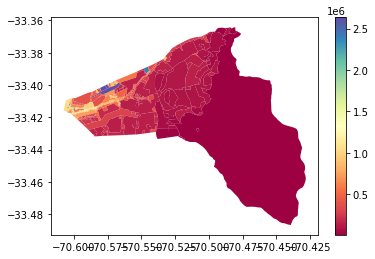

In [6]:
fig, ax = plt.subplots(1, 1)
BasePrice_LC.plot(column = "valor_2", cmap = "Spectral", ax = ax, legend = True)